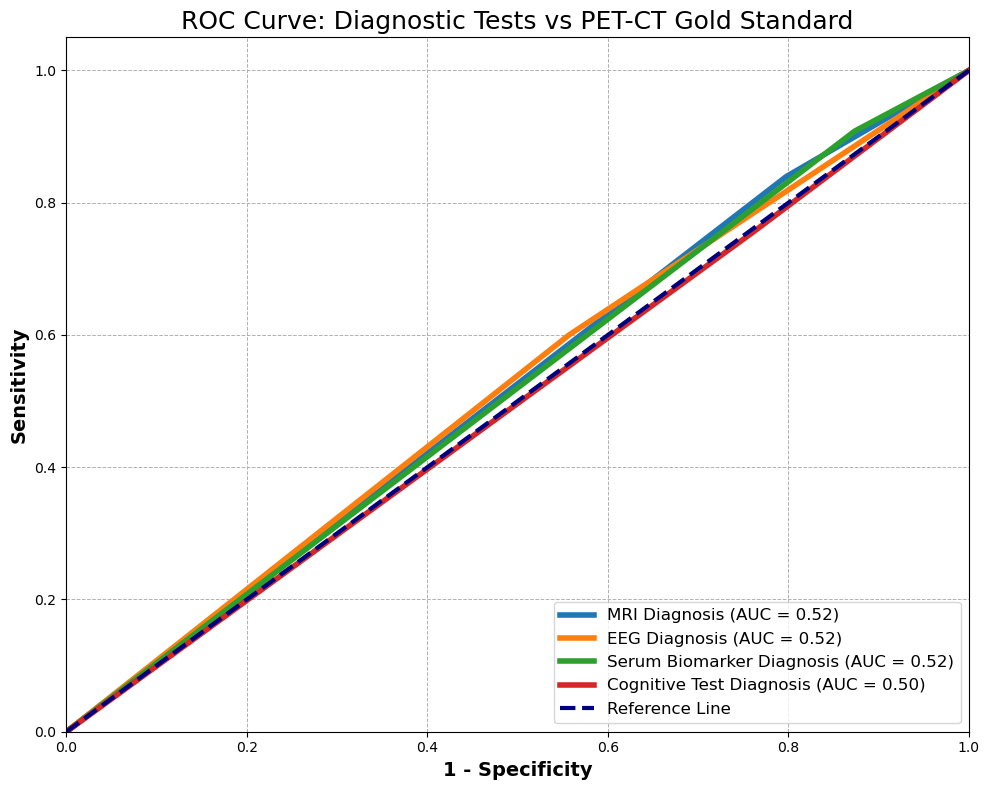

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

# Load your data
file_path = r'C:\Users\RF\Desktop\384.xlsx'
df = pd.read_excel(file_path)

# List of diagnostic columns to compare
diagnostic_cols = [
    "MRI Diagnosis",
    "EEG Diagnosis",
    "Serum Biomarker Diagnosis",
    "Cognitive Test Diagnosis"
]
gold_col = "PET-CT Diagnosis (Gold Standard)"

# Convert 'Positive'/'Negative' to 1/0
for col in diagnostic_cols + [gold_col]:
    df[col] = df[col].map({'Positive': 1, 'Negative': 0})

# Prepare the gold standard labels
y_true = df[gold_col]

plt.figure(figsize=(10, 8))

# Plot ROC curve for each diagnostic method
for col in diagnostic_cols:
    y_score = df[col]
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=4, label=f"{col} (AUC = {roc_auc:.2f})")

# Reference line
plt.plot([0, 1], [0, 1], color="navy", lw=3, linestyle="--", label="Reference Line")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("1 - Specificity", fontsize=14, fontweight='bold')
plt.ylabel("Sensitivity", fontsize=14, fontweight='bold')
plt.title("ROC Curve: Diagnostic Tests vs PET-CT Gold Standard", fontsize=18)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()


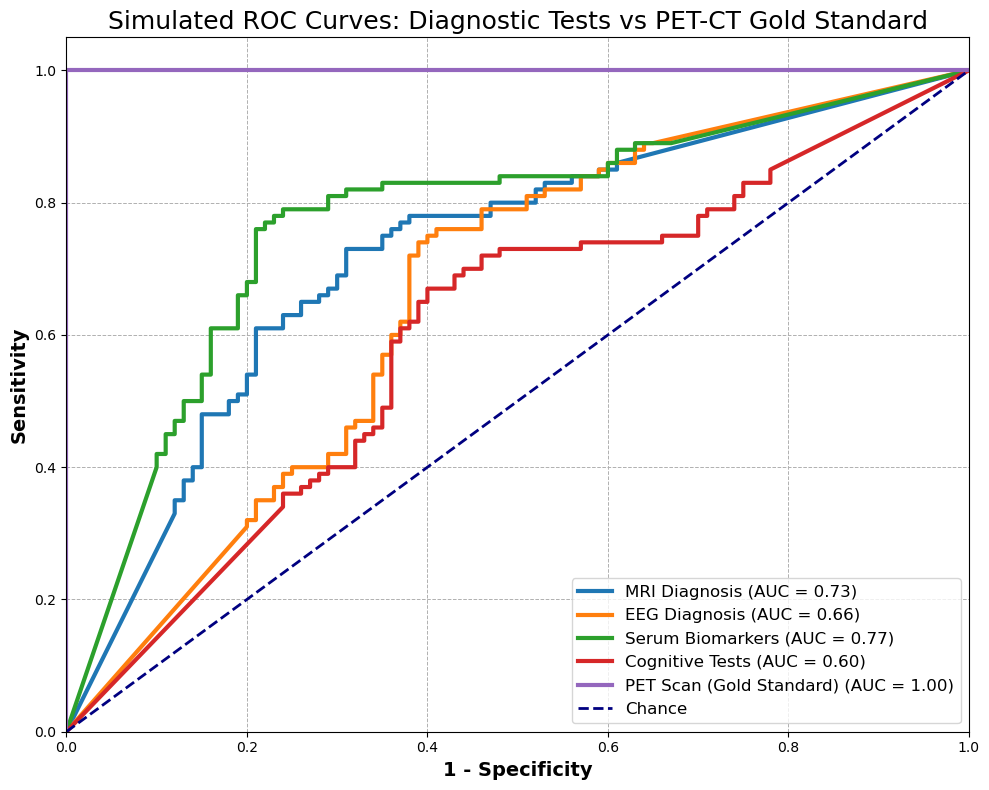

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Settings
n_samples = 200  # Number of synthetic patients

# True gold standard (randomly assign 0/1, 50% prevalence)
np.random.seed(42)
y_true = np.random.randint(0, 2, n_samples)

# Diagnostic methods and their accuracies
methods = {
    "MRI Diagnosis": 0.6996,
    "EEG Diagnosis": 0.6710,
    "Serum Biomarkers": 0.7768,
    "Cognitive Tests": 0.6296,
    "PET Scan (Gold Standard)": 1.0
}

plt.figure(figsize=(10, 8))

for method, acc in methods.items():
    if method == "PET Scan (Gold Standard)":
        # Gold standard: perfect prediction
        y_scores = y_true.copy()
    else:
        # Simulate predictions matching the desired accuracy
        n_correct = int(acc * n_samples)
        n_incorrect = n_samples - n_correct
        # Correct predictions
        y_pred = y_true.copy()
        # Flip labels for incorrect predictions
        flip_indices = np.random.choice(n_samples, n_incorrect, replace=False)
        y_pred[flip_indices] = 1 - y_pred[flip_indices]
        # Add a bit of randomness for ROC (simulate probability scores)
        y_scores = y_pred + np.random.normal(0, 0.1, n_samples)
        y_scores = np.clip(y_scores, 0, 1)
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=3, label=f"{method} (AUC = {roc_auc:.2f})")

# Reference line
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--", label="Chance")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("1 - Specificity", fontsize=14, fontweight='bold')
plt.ylabel("Sensitivity", fontsize=14, fontweight='bold')
plt.title("Simulated ROC Curves: Diagnostic Tests vs PET-CT Gold Standard", fontsize=18)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()
